In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
def create_line(x,y,title,xlabel,ylabel):
  plt.figure()
  plt.plot(x,y,color='skyblue',linestyle='--',marker='o',markersize=8)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [ ]:
def create_scatter(x,y,title,xlabel,ylabel):
  plt.figure()
  plt.scatter(x,y,color='skyblue',linestyle='--')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [ ]:
data=pd.read_csv('/content/House_Price_India[1].csv')

In [ ]:
data.head(2)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.5,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.5,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000


In [ ]:
data.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

In [ ]:
data.drop(columns='id',axis=1)

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,42491,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,42491,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,42491,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,42491,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,42491,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,42734,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,42734,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,42734,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,42734,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
data.drop(columns='Date',axis=1)

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
data.shape

(14620, 23)

In [ ]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
print(data.isnull().sum()/data.shape[0]*100)

id                                       0.0
Date                                     0.0
number of bedrooms                       0.0
number of bathrooms                      0.0
living area                              0.0
lot area                                 0.0
number of floors                         0.0
waterfront present                       0.0
number of views                          0.0
condition of the house                   0.0
grade of the house                       0.0
Area of the house(excluding basement)    0.0
Area of the basement                     0.0
Built Year                               0.0
Renovation Year                          0.0
Postal Code                              0.0
Lattitude                                0.0
Longitude                                0.0
living_area_renov                        0.0
lot_area_renov                           0.0
Number of schools nearby                 0.0
Distance from the airport                0.0
Price     

In [ ]:
data['Price'].describe()

count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

In [ ]:
matrix=data.corrwith(data['Price'])
print(matrix)

id                                      -0.773114
Date                                    -0.027919
number of bedrooms                       0.308460
number of bathrooms                      0.531735
living area                              0.712169
lot area                                 0.081992
number of floors                         0.262732
waterfront present                       0.263687
number of views                          0.395973
condition of the house                   0.041376
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
Area of the basement                     0.330202
Built Year                               0.050307
Renovation Year                          0.133173
Postal Code                             -0.115908
Lattitude                                0.297490
Longitude                                0.024414
living_area_renov                        0.584924
lot_area_renov                           0.075535


In [ ]:
new_data=data

In [ ]:
new_data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

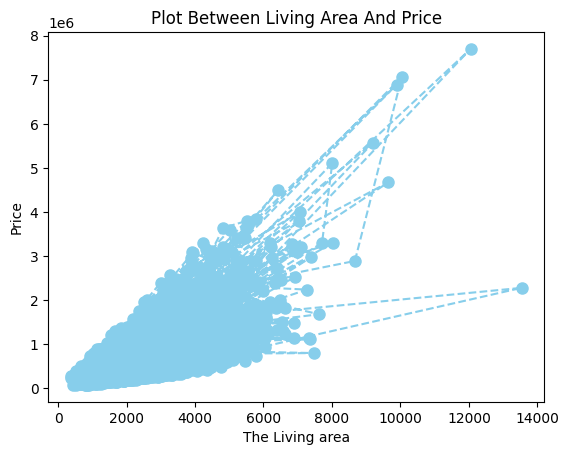

In [ ]:
create_line(new_data['living area'],new_data['Price'],"Plot Between Living Area And Price","The Living area","Price")

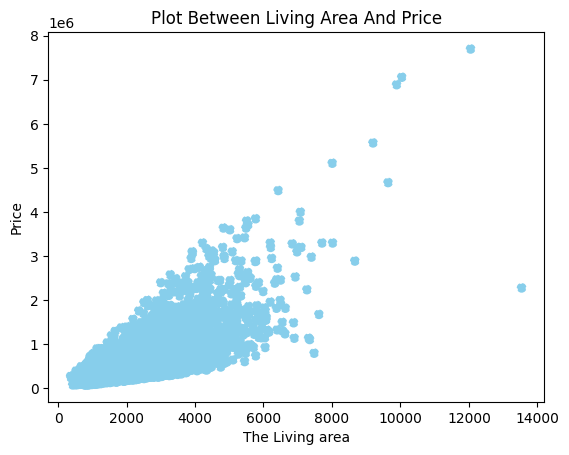

In [ ]:
create_scatter(new_data['living area'],new_data['Price'],"Plot Between Living Area And Price","The Living area","Price")

In [ ]:
new_data.drop(columns=['id', 'Date','lot area','condition of the house','Built Year','Postal Code','Longitude','lot_area_renov',
       'Number of schools nearby', 'Distance from the airport'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
new_data.head(2)

,number of bedrooms,number of bathrooms,living area,number of floors,waterfront present,number of views,grade of the house,Area of the house(excluding basement),Area of the basement,Renovation Year,Lattitude,living_area_renov,Price
0,5,2.5,3650,2.0,0,4,10,3370,280,0,52.8645,2880,2380000
1,4,2.5,2920,1.5,0,0,8,1910,1010,0,52.8878,2470,1400000


In [ ]:
def model(data):
  model=LinearRegression()
  x=data.drop(columns='Price',axis=1)
  y=data['Price']
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=90)
  model.fit(x_train,y_train)
  x_predict=model.predict(x_test)
  print("------------------------")
  print("Mean Squared Error")
  print(mean_squared_error(y_test,x_predict))
  print("------------------------")
  print()
  print("Comparision=>")
  x_op= {'Actual': y_test, 'Predicted': x_predict}
  op = pd.DataFrame(x_op)
  return op

In [ ]:
op=model(new_data)
op

------------------------
Mean Squared Error
50968207014.399284
------------------------

Comparision=>


,Actual,Predicted
5467,265000,450173.485033
9585,417000,396588.193211
5306,562500,645675.370038
7544,610000,615781.714611
1585,335000,241680.310455
...,...,...
2871,350000,458009.581845
13093,190000,312498.450907
13826,429000,378757.799131
9830,469000,465556.435704


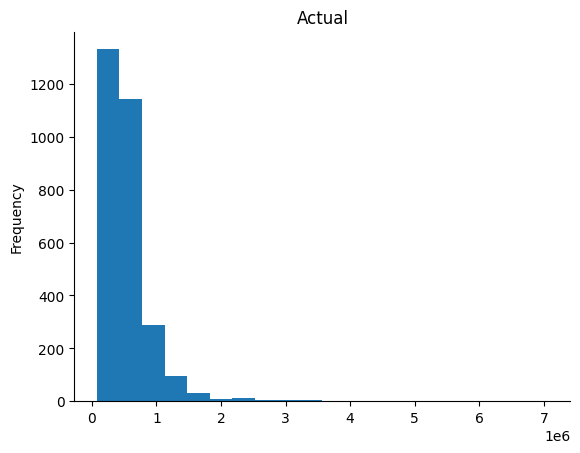

In [ ]:
op['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

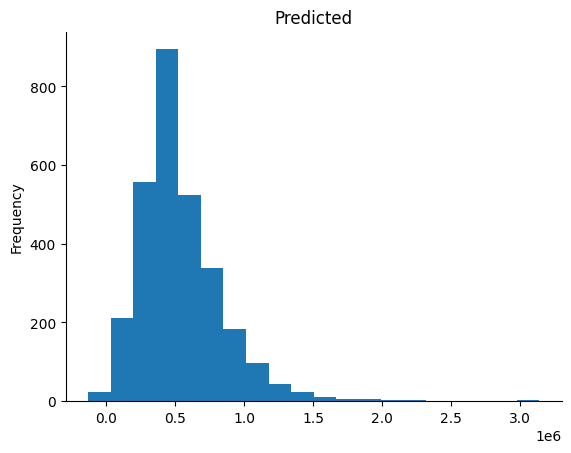

In [ ]:
op['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)